In [36]:
from tools.coco_tools import read_file, get_instances_per_class
from pandas import DataFrame
import numpy as np
import pandas as pd
import os
import skimage.io as io
import matplotlib.pyplot as plt



In [8]:
def get_df(PART_PATH, idx):
    annotations = read_file(PART_PATH)
    final_dict = {}
    final_dict["Images"] = len(annotations["images"])
    final_dict["Instances"] = len(annotations["annotations"])
    final_dict["Categories"] = len(annotations["categories"])
    cat_len  = get_instances_per_class(annotations["annotations"])
    
    idx_to_name  = {}
    for cat in annotations["categories"]:
        idx_to_name[cat["id"]] = cat["name"]
        
    name_len = list(map(lambda x: (idx_to_name[x[0]], x[1]), cat_len.items()))
    name_len.sort(key = lambda t: t[0])
    for (name, length) in name_len:
        final_dict[name] = length
    return pd.DataFrame(final_dict, index = [idx])

def summary(ds):
    PART_PATH_TRAIN = "data/coco/parts/annotations/"+str(ds)+"_train.json"
    PART_PATH_VAL = "data/coco/parts/annotations/"+str(ds)+"_val.json"
    train = get_df(PART_PATH_TRAIN, "train")
    val = get_df(PART_PATH_VAL, "val")
    total = pd.concat([train, val])
    return total
    

In [9]:
summary(0)

,Images,Instances,Categories,airplane,banana,baseball bat,baseball glove,bear,bed,bench,...,sink,skis,spoon,teddy bear,toaster,toothbrush,traffic light,train,umbrella,wine glass
train,43558,144135,39,3714,5241,1379,1545,1197,2463,4715,...,3012,2905,2600,3249,107,1168,6007,3122,5319,3097
val,1864,6200,39,99,207,59,58,65,91,201,...,125,98,101,115,5,27,356,125,183,125


In [10]:
summary(1)

,Images,Instances,Categories,apple,backpack,bicycle,bird,book,bowl,broccoli,...,stop sign,suitcase,surfboard,tennis racket,tie,toilet,truck,tv,vase,zebra
train,46315,164325,40,3346,3532,3009,7449,11507,6831,4879,...,1469,3554,3022,2076,2815,2925,4909,2633,3578,5093
val,1938,6911,40,137,114,135,291,557,264,177,...,54,151,126,96,109,126,225,121,149,266


In [11]:
summary(2)

,Images,Instances,Categories,person
train,27393,108806,1,108806
val,1150,4500,1,4500


In [12]:
ds = 0
annotations = read_file("data/coco/parts/annotations/"+str(ds)+"_train.json")

In [19]:
images = annotations["images"]
path = 'data/coco/train2017/'
listdir = os.listdir(path)

In [32]:
img = 554625
basename = '0'*(12-len(str(img))) + str(img)+".jpg" 
filename = os.path.join(path, basename )

NameError: name 'anns' is not defined

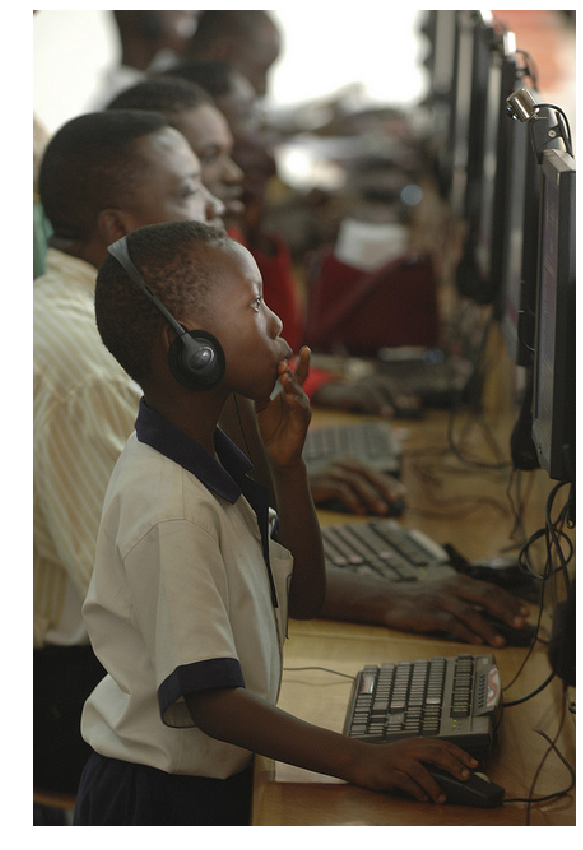

In [37]:
I = io.imread(filename)
# Create a Rectangle patch
fig,ax = plt.subplots(1, figsize=(15,15))
plt.imshow(I); plt.axis('off')

for bbox in bboxes:
    x, y, w, h = bbox
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none' )
    ax.add_patch(rect)